## Diabetes

Santiago Rodriguez

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
diabetes = pd.read_csv('C:/Users/santi/OneDrive/Documents/AnalisisDeCienciaDeDatos/AnalisisDeCienciaDeDatos4toSemestre/diabetes.csv')
diabetes.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [80]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [81]:
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())


Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64


In [83]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')['Age'].count())

Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [84]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())

Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [85]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())

Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [86]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

print(diabetes_mod.shape)

(724, 9)


In [87]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

## Modelos

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)

In [92]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

c:\Users\santi\anaconda3\envs\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.729282
1  SVC  0.740331
2   LR  0.762431
3   DT  0.707182
4  GNB  0.734807
5   RF  0.773481
6   GB  0.773481


In [93]:
from sklearn.model_selection import KFold

names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

c:\Users\santi\anaconda3\envs\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\santi\anaconda3\envs\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

  Name     Score
0  KNN  0.719787
1  SVC  0.758581
2   LR  0.766667
3   DT  0.678272
4  GNB  0.757021
5   RF  0.754414
6   GB  0.773649


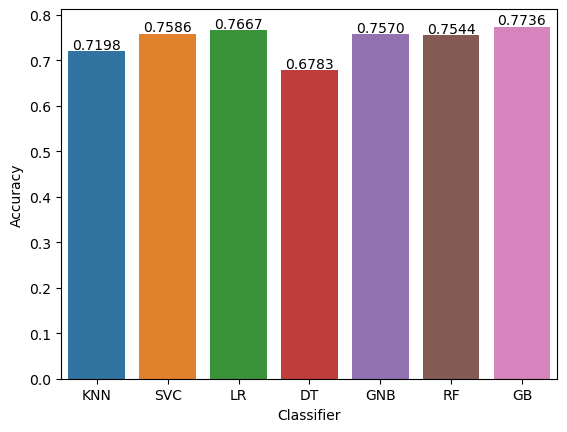

In [94]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## Red neuronal

In [95]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

c:\Users\santi\anaconda3\envs\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


El parametro relu se refiere a la funcion de activacion utilizada por la red neuronal para 'activar' una nuerona, es decir, dicta que valor tiene que tener un dato ingresado para activar la neurona. El solver es el tipo de optimizador que se va a utilizar para modificar el valor ingresado a la neurona, en este caso, es el adam, que es un tipo de stochastic gradient descent optimizer.

In [96]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[317  39]
 [103  84]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       356
           1       0.68      0.45      0.54       187

    accuracy                           0.74       543
   macro avg       0.72      0.67      0.68       543
weighted avg       0.73      0.74      0.72       543



In [97]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[99 20]
 [33 29]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       119
           1       0.59      0.47      0.52        62

    accuracy                           0.71       181
   macro avg       0.67      0.65      0.66       181
weighted avg       0.70      0.71      0.70       181



## Qué aspectos se revisaron para la preparación de datos? ¿Qué cambios se hicieron?

Lo principal fue que solo se escogieron las filas de la base de datos que no tenian valores 0 en Blood pressure, BMI o glucosa, ya que en estas variables fue encontrado que existian valores 0 o nulos.

## ¿Qué modelos de aprendizaje se probaron?

Se probaron modelos de aprendizaje supervisados; el K nearest neighbors, regresion logistica, red neuronal, gradient boost, etc. Son todos ejemplos de modelos de aprendizaje supervisados. 

## Compara el resultado de todos los modelos. ¿Cuál es mejor?

El mejor modelo segun la metrica de accuracy o exactitud es el de GradientBoost, ya que tiene el valor mas alto de 0.77; los otros ams cercanos son los de support vector classifiers y regresion logistica. 